# Lead Scoring Case Study

# 1. Business Understanding
## Problem Statement

-  An education company named X Education sells online courses to industry professionals. Now althrough X Education gets a lots of leads in this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is very poor around 30%. And the compamy wants to increase it to 80%.

## Goal

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
- A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
- To adjust to if the company's requirement changes in the future so you will need to handle these as well.

# 2. Reading and Understanding the Data


###  Import Libraries

In [1259]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
import plotly.graph_objs as go
import plotly
from plotly import tools
from plotly.subplots import make_subplots
from matplotlib.pyplot import xticks
%matplotlib inline


from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell

from statsmodels.stats.outliers_influence import variance_inflation_factor

# from collections import defaultdictanory
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### Reading the input file

In [1260]:
#Reading the leads csv file
inp0 = pd.read_csv("Leads.csv")
inp0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Routine structure check / Inspecting the Dataframe

In [1261]:
# Checking the number of rows and columns in the dataframe
inp0.shape

(9240, 37)

In [1262]:
# Check the column-wise info of the dataframe
inp0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###  Duplicate Check

In [1263]:
# Create a dummy dataframe (copy of original inp0) for duplicate check
inp0_dup = inp0

# Checking for duplicates and dropping the entire duplicate row if any
inp0_dup.drop_duplicates(subset=None, inplace=True)

inp0_dup.shape

(9240, 37)

- #### Insights: - 
The shape after running the drop duplicate command is same as the original dataframe. Hence we can conclude that there were NO DUPLICATE values in the dataset

In [1264]:
# Check the summary for the numeric columns
inp0.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Understanding data

- The given dataset has 9240 rows and 37 columns. 
- Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.
- Independent Variable :
  Prospect ID,
  Lead Number,
  Lead Origin,
  Lead Source,
  Do Not Email,
  Do Not Call,
  TotalVisits,
  Total Time Spent on Website,
  Page Views Per Visit,
  Last Activity,
  Country,
  Specialization,
  How did you hear about X Education,
  What is your current occupation,
  What matters most to you in choosing this course,
  Search,
  Magazine,
  Newspaper Article,
  X Education Forums,
  Newspaper,
  Digital Advertisement,
  Through Recommendations,
  Receive More Updates About Our Courses,
  Tags,
  Lead Quality,
  Update me on Supply Chain Content,
  Get updates on DM Content,
  Lead Profile,
  City,
  Asymmetrique Activity Index,
  Asymmetrique Profile Index,
  Asymmetrique Activity Score,
  Asymmetrique Profile Score,
  I agree to pay the amount through cheque,
  a free copy of Mastering The Interview,
  Last Notable Activity
- Dependent Variable : Converted
- Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

### Data Cleaning , Sanity Check and Preparation

####  As we can understand that there are 'Select' values for many column. This is because customer did not select any option from the list, hence it shows 'Select'. Select values are as good as NULL.

In [1265]:
# Select all non-numeric columns
inp0_obj = inp0.select_dtypes(include='object')

# Find out columns that have "Select"
s = lambda x: x.str.contains('Select', na=False)
l = inp0_obj.columns[inp0_obj.apply(s).any()].tolist()
print (l)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


#### There are 4 columns that contains Select, which are effectively null values. We are going to make that change.

In [1266]:
# select all the columns that have a "Select" entry
sel_cols = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

# replace values
inp0[sel_cols] = inp0[sel_cols].replace('Select', np.NaN)

In [1267]:
# percentage of missing values in each column
round(100*(inp0.isnull().sum()/len(inp0.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

####  Insights:
As you can see there are a lot of column which have high number of missing values. We will drop the columns having more than 30% NA values, because it is not a great move if we are imputing more than approx. 40% of data based on predictions and assumptions. Then rest columns ( less than 40% missing values) we will check one by one to decide to drop or impute.

### Drop columns that have null values > 40% 

In [1268]:
# List of Columns & NA counts where NA values are more than 40%
NA_col = inp0.isnull().sum().sort_values(ascending = False)
NA_col = NA_col[NA_col.values >(0.40*len(inp0))]

In [1269]:
# Number of columns having percentage of null values > 40%
len(NA_col)

7

In [1270]:
#dropping the above columns from dataframe for further analysis
inp0_df = inp0.drop(columns=NA_col.index)

In [1271]:
inp0_df.shape

(9240, 30)

In [1272]:
# Let see after drop of 7 columns what are left and how can we treat those.
# percentage of missing values in each column

round(100*(inp0_df.isnull().sum()/len(inp0_df.index)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

#### Insights: 
There are 10 columns that still have  null values: 'City','Specialization','Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'country','TotalVisits', 'Page Views Per Visit', 'Last Activity', and  'Lead Source'. We will look at them individually to see what can be done.

In [1273]:
# percentage of missing values in each row
inp0_df.apply(lambda x: round(100*(sum(x.isnull().values)/len(inp0_df.index)),2), axis = 1).sort_values(ascending=False)

5840    0.09
680     0.09
1126    0.08
1124    0.08
2942    0.08
        ... 
7285    0.00
7289    0.00
3539    0.00
3538    0.00
9239    0.00
Length: 9240, dtype: float64

#### Ingights:
The maximum percentage having missing values in row is only 9 %. So we will not drop any rows.

#### Furthermore, we can also drop Sales generated columns because those are the data entries that are made after the sales team has connected with the student. Those data have no bearing to the purpose of our model ie. providing lead score. The columns are
- tags
- lead_quality
- All asymmetrique columns
- last_activity
- last_notable_activity

As already the columns 'lead_quality', and All asymmetrique columns are dropped becase of having more than 45 % missing values, we are left with columns only 'Tags', 'Last Activity', 'Last Notable Activity' to drop. 

In [1274]:
inp0_df.drop(['Tags', 'Last Activity', 'Last Notable Activity'], 
        axis = 1, inplace = True)

inp0_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Treating the rest of the columns which have NULL values.



####  Column: 'City'  

In [1275]:
# City  City of customer
inp0_df.City.value_counts(normalize = True, dropna = False) * 100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

#### Insights:
Looking at the values percentage, We will categorize cities based on logical decisions and impute proportionately

In [1276]:
# categorize all non-mumbai, but Maharashtra cities as 'Non-Mumbai Maharashtra Cities'
inp0_df.loc[(inp0_df.City == 'Thane & Outskirts') | (inp0_df.City == 'Other Cities of Maharashtra'), 
       'City'] = 'Non-Mumbai Maharashtra Cities'

# categorize all other cities as 'Non-Maharashtra Cities'
inp0_df.loc[(inp0_df.City == 'Other Cities') | (inp0_df.City == 'Other Metro Cities') | (inp0_df.City == 'Tier II Cities') , 
       'City'] = 'Non-Maharashtra Cities'

inp0_df.City.value_counts(normalize = True) * 100

Mumbai                           57.835218
Non-Mumbai Maharashtra Cities    21.701669
Non-Maharashtra Cities           20.463113
Name: City, dtype: float64

In [1277]:
# impute proportionately
inp0_df['City'] = inp0_df.City.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 
                                                                    'Non-Maharashtra Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(inp0_df))))

inp0_df.City.value_counts(normalize = True, dropna = False) * 100

Mumbai                           58.528139
Non-Mumbai Maharashtra Cities    21.222944
Non-Maharashtra Cities           20.248918
Name: City, dtype: float64

#### Column: Specialization

In [1278]:
# Specialization : The industry domain in which the customer worked before.
inp0_df.Specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### Insights:
For specialization, we can first combine categories based on the course type, and then impute proportionally to maintain the distribution and not introduce bias.

In [1279]:
# categorize all management courses
inp0_df.loc[(inp0_df.Specialization == 'Finance Management') | (inp0_df.Specialization == 'Human Resource Management') | 
       (inp0_df.Specialization == 'Marketing Management') |  (inp0_df.Specialization == 'Operations Management') |
       (inp0_df.Specialization == 'IT Projects Management') | (inp0_df.Specialization == 'Supply Chain Management') |
       (inp0_df.Specialization == 'Healthcare Management') | (inp0_df.Specialization == 'Hospitality Management') |
       (inp0_df.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'

# categorize all busines courses
inp0_df.loc[(inp0_df.Specialization == 'Business Administration') | (inp0_df.Specialization == 'International Business') | 
       (inp0_df.Specialization == 'Rural and Agribusiness') | (inp0_df.Specialization == 'E-Business') 
        , 'Specialization'] = 'Business Specializations'

# categorize all industry courses
inp0_df.loc[(inp0_df.Specialization == 'Banking, Investment And Insurance') | (inp0_df.Specialization == 'Media and Advertising') |
       (inp0_df.Specialization == 'Travel and Tourism') | (inp0_df.Specialization == 'Services Excellence') |
       (inp0_df.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

inp0_df.Specialization.value_counts(normalize = True) * 100

Management Specializations    72.576792
Industry Specializations      15.290102
Business Specializations      12.133106
Name: Specialization, dtype: float64

In [1280]:
# impute proportionately
inp0_df['Specialization'] = inp0_df.Specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(inp0_df))))

inp0_df.Specialization.value_counts(normalize = True, dropna = False) * 100

Management Specializations    72.813853
Industry Specializations      15.281385
Business Specializations      11.904762
Name: Specialization, dtype: float64

####  Column:  'What matters most to you in choosing a course' 

In [1281]:
# 'What matters most to you in choosing this course' Column : An option selected by the customer indicating what is their main motto behind doing this course.
inp0_df['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

#### Observation: 
The distribution of the data is very heavily skewed,and with Better career prospects + null values = approx 100% of the total. It is safe to drop this column.

In [1282]:
inp0_df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

#### Column: Lead Source

In [1283]:
inp0_df['Lead Source'].value_counts(normalize = True, dropna = False) * 100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
WeLearn               0.010823
youtubechannel        0.010823
NC_EDM                0.010823
blog                  0.010823
welearnblog_Home      0.010823
testone               0.010823
Pay per Click Ads     0.010823
Name: Lead Source, dtype: float64

In [1284]:
# We found one column 'Lead Source' is having same label name 'Google' but in different format('google') so we need to make them in a same format hence using below commands.

# Replacing google value with Google
inp0_df.loc[inp0_df['Lead Source'] == 'google','Lead Source'] = 'Google'
inp0_df['Lead Source'].value_counts(normalize = True, dropna = False) * 100

Google               31.093074
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
Pay per Click Ads     0.010823
blog                  0.010823
welearnblog_Home      0.010823
NC_EDM                0.010823
testone               0.010823
WeLearn               0.010823
youtubechannel        0.010823
Name: Lead Source, dtype: float64

In [1285]:
# Lets impute the missing values with the mode of data i.e. clearly 'Google'
inp0_df['Lead Source'].fillna(inp0_df['Lead Source'].mode()[0], inplace=True)

In [1286]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
inp0_df['Lead Source'] = inp0_df['Lead Source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference') | (x=='Welingak Website') |
                                             (x=='Referral Sites') | (x=='Facebook')) 
                                            else 'Other Social Sites')

inp0_df['Lead Source'].value_counts(normalize = True, dropna = False) * 100

Google                31.482684
Direct Traffic        27.521645
Olark Chat            18.993506
Organic Search        12.489177
Reference              5.779221
Welingak Website       1.536797
Referral Sites         1.352814
Facebook               0.595238
Other Social Sites     0.248918
Name: Lead Source, dtype: float64

#### Column: 'What is your current occupation' 

In [1287]:
# 'What is your current occupation' Column : Indicates whether the customer is a student, umemployed or employed.
inp0_df['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

#### Observation
For occupation, we can first combine categories, and then impute proportionally to maintain the distribution and not introduce bias.

In [1288]:
# combine categories having very less percentage
inp0_df.loc[(inp0_df['What is your current occupation'] == 'Student') | (inp0_df['What is your current occupation'] == 'Other') | 
            (inp0_df['What is your current occupation'] == 'Housewife') | (inp0_df['What is your current occupation'] == 'Businessman') , 'What is your current occupation'] = 'Student and Others'

inp0_df['What is your current occupation'].value_counts(normalize = True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student and Others       3.725191
Name: What is your current occupation, dtype: float64

In [1289]:
# impute proportionately
inp0_df['What is your current occupation'] = inp0_df['What is your current occupation'].fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(inp0_df))))



inp0_df['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100

Unemployed              84.967532
Working Professional    11.049784
Student and Others       3.982684
Name: What is your current occupation, dtype: float64

#### Coulmn: Country

In [1290]:
# Country : The country of the customer.
inp0_df['Country'].value_counts(normalize = True, dropna = False) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Germany                  0.043290
Nigeria                  0.043290
Canada                   0.043290
South Africa             0.043290
Kuwait                   0.043290
Sweden                   0.032468
Asia/Pacific Region      0.021645
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Belgium                  0.021645
Bangladesh               0.021645
China                    0.021645
Ghana                    0.021645
Netherlands              0.021645
Kenya         

#### Observation
The distribution of the data is very heavily skewed, with India + null values = 96.9 approx 97% of the total. It is safe to drop this column.

In [1291]:
inp0_df.drop('Country', axis = 1, inplace = True)

#### Column: TotalVisits

In [1292]:
# TotalVisits : The total number of visits made by the customer on the website.
inp0_df['TotalVisits'].value_counts(normalize = True, dropna = False) * 100

0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
27.0      0.054113
25.0      0.054113
24.0      0.054113
22.0      0.032468
26.0      0.021645
29.0      0.021645
28.0      0.021645
115.0     0.010823
54.0      0.010823
43.0      0.010823
30.0      0.010823
32.0      0.010823
74.0      0.010823
251.0     0.010823
41.0      0.010823
141.0     0.010823
42.0      0.010823
55.0      0.010823
Name: TotalVisits, dtype: float64

#### 0.0 is having highest number of occurences,lets see the median value.  

In [1293]:
inp0_df['TotalVisits'].median()

3.0

#### Column: Page Views Per Visit

In [1294]:
# Page Views Per Visit : Average number of pages on the website viewed during the visits.
inp0_df['Page Views Per Visit'].value_counts(normalize = True, dropna = False) * 100

0.00    23.690476
2.00    19.426407
3.00    12.943723
4.00     9.696970
1.00     7.045455
          ...    
1.45     0.010823
1.64     0.010823
1.21     0.010823
2.14     0.010823
3.83     0.010823
Name: Page Views Per Visit, Length: 115, dtype: float64

In [1295]:
inp0_df['Page Views Per Visit'].median()

2.0

In [1296]:
inp0_df['TotalVisits'] = inp0_df['TotalVisits'].fillna(inp0_df['TotalVisits'].median())
inp0_df['TotalVisits'].isnull().value_counts()

False    9240
Name: TotalVisits, dtype: int64

In [1297]:
# For this column, we need to handle the missing values, and can convert the datatype to integer since visits can't be decimal
inp0_df['TotalVisits'] = inp0_df['TotalVisits'].astype('int')

In [1298]:
inp0_df['Page Views Per Visit'] = inp0_df['Page Views Per Visit'].fillna(inp0_df['Page Views Per Visit'].median())
inp0_df['Page Views Per Visit'].isnull().value_counts()

False    9240
Name: Page Views Per Visit, dtype: int64

###  Identifying Categorical and Continious features.

- Continious features in the dataset are 'Lead Number', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'

- While the rest features left after dropping  are categorical

#### Handle Binary columns for Categorical features

- We will check columns for significant data imbalance
- We will check for those columns that have only 1 unique entry and drop it.

In [1299]:
# Determine unique values
for k, v in inp0_df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Prospect ID = 9240
Lead Origin = 5
Lead Source = 9
Do Not Email = 2
Do Not Call = 2
Specialization = 3
What is your current occupation = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
City = 3
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2


#### Observation : The following columns can be dropped as they have just 1 unique values
- Magazine
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

#### Let's now check the data imbalance for the rest of the columns

In [1300]:
# select rest of the binary columns in a new dataframe
inp0_df_bin = inp0_df[['Do Not Email', 'Do Not Call','Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']]

# see value counts for each of the columns
for i in inp0_df_bin.columns:
    x = (inp0_df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64



#### Observations
Because of heavy data imbalance for the above binaray columns except two columns, we can drop the following columns as well

- 'Do Not Call',
- 'Search', 
- 'Newspaper Article', 
- 'X Education Forums', 
- 'Newspaper', 
- 'Digital Advertisement', 
- 'Through Recommendations'

In [1301]:
# Drop the columns as per the above observation.
drop_bin = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call','Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper', 'Digital Advertisement', 'Through Recommendations',]

inp0_df.drop(drop_bin, axis = 1, inplace = True)

#### Column: Prospect ID
Prospect ID column is a unique identifier for each leads and e already have 'lead Number' column is a unique identifier for each leads. So lets drop Prospect ID column.

In [1302]:
inp0_df.drop('Prospect ID', axis = 1, inplace = True)

#### Handle Numerical features

#####  Column : Lead Number

In [1303]:
#### 'lead Number' column is a unique identifier for each leads. Therefore, aggregations won't be of any relevance. We should change it to object.

inp0_df['Lead Number'] = inp0_df['Lead Number'].astype('object')

In [1304]:
inp0_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   int32  
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  City                                    9240 non-null   obje

# 3. EDA (Exploratory Data Analysis)


###  3.1 Visualising Numeric Variables

##### Converted

In [1305]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
Converted = (sum(inp0_df['Converted'])/len(inp0_df['Converted'].index))*100
Converted

38.53896103896104

##### 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' 

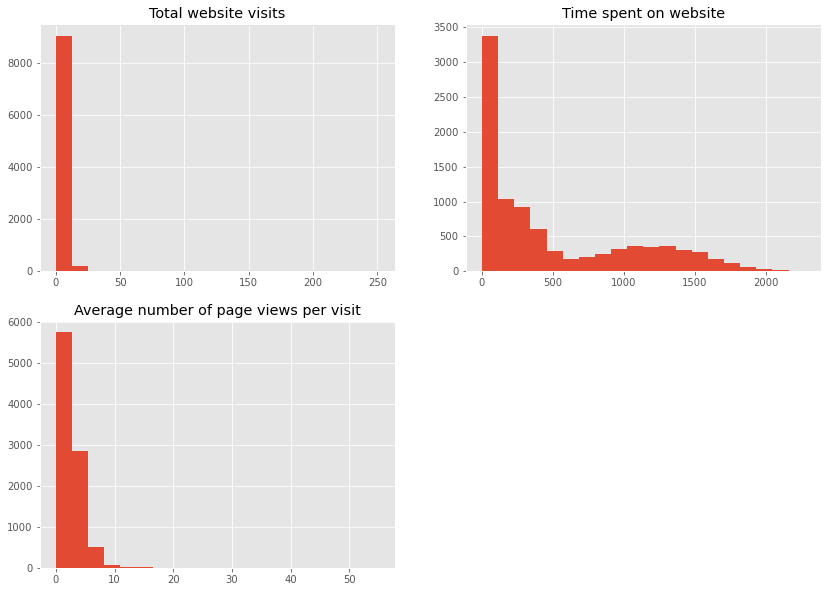

In [1306]:
# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(inp0_df['TotalVisits'], bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(inp0_df['Total Time Spent on Website'], bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(inp0_df['Page Views Per Visit'], bins = 20)
plt.title('Average number of page views per visit')

plt.show()

##### Observations

- High peaks and skewed data. There might be a possibility of outliers. We will check them next

#### Checking for outliers

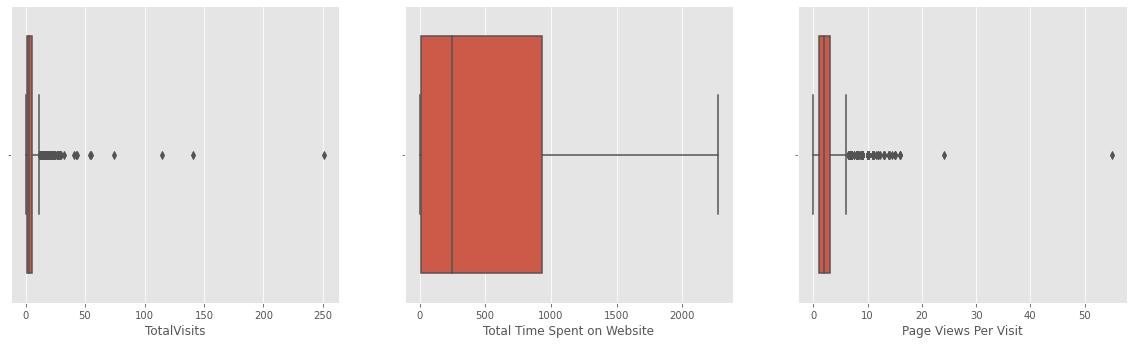

In [1307]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(inp0_df['TotalVisits'])
plt.subplot(2,3,2)
sns.boxplot(inp0_df['Total Time Spent on Website'])
plt.subplot(2,3,3)
sns.boxplot(inp0_df['Page Views Per Visit'])

plt.show()

#### Observation:
- Looking at both the box plots and the statistics, there are upper bound outliers in both TotalVisits and 'Page Views Per Visit' columns. We can also see that the data can be capped at 95 percentile for analysis.

In [1308]:

percentiles = inp0_df['TotalVisits'].quantile([0.05,0.95]).values
inp0_df['TotalVisits'][inp0_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
inp0_df['TotalVisits'][inp0_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

percentiles_p = inp0_df['Page Views Per Visit'].quantile([0.05,0.95]).values
inp0_df['Page Views Per Visit'][inp0_df['Page Views Per Visit'] <= percentiles_p[0]] = percentiles_p[0]
inp0_df['Page Views Per Visit'][inp0_df['Page Views Per Visit'] >= percentiles_p[1]] = percentiles_p[1]

<AxesSubplot:xlabel='TotalVisits'>

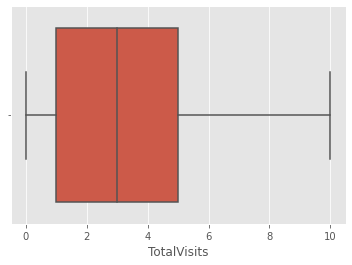

In [1309]:
sns.boxplot(inp0_df['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

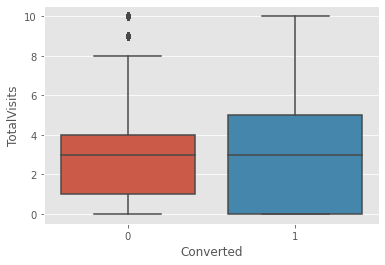

In [1310]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = inp0_df)

##### Insights:
- Median for converted and not converted leads are the same.
- Nothng conclusive can be said on the basis of Total Visits.

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

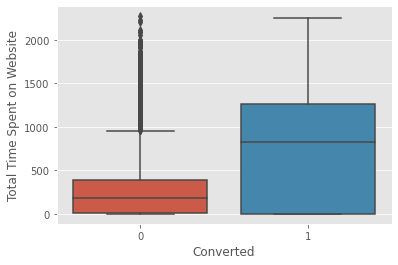

In [1311]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = inp0_df)

##### Insights:
- Leads spending more time on the weblise are more likely to be converted.
- Website should be made more engaging to make leads spend more time.

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

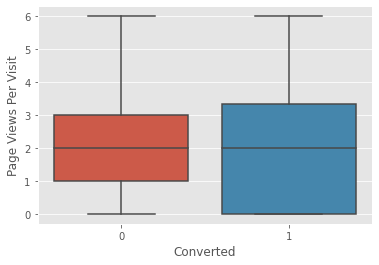

In [1312]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = inp0_df)

##### Insights:
- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

### 3.2 Visualizing Categorical Variables

##### Function to use to plot for univariate of some categorical variables

In [1313]:
# Dividing the original dataset into two different datasets depending upon the target value
H0 = inp0_df.loc[inp0_df.Converted == 0]
H1 = inp0_df.loc[inp0_df.Converted == 1]

In [1314]:
def univar_plot(feature,title):
    
    # Create subplots: use 'domain' type for Pie subplot
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    H0_p  = H0[feature].value_counts().rename_axis('unique_values').to_frame('cnt')
    H1_p  = H1[feature].value_counts().rename_axis('unique_values').to_frame('cnt')

    fig.add_trace(go.Pie(labels=H0_p.index, values=H0_p.cnt, name="Converted 0"),
              1, 1)
    fig.add_trace(go.Pie(labels=H1_p.index, values=H1_p.cnt, name="Converted 1"),
              1, 2)
    # Use `hole` to create a donut-like pie chart
    fig.update_traces(hole=.5, hoverinfo="label+percent+name")

    fig.update_layout(
    title_text=title,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Converted_0', x=0.12, y=0.5, font_size=20, showarrow=False),
                 dict(text='Converted_1', x=0.88, y=0.5, font_size=20, showarrow=False)])
    fig.show()

#### Lead Origin

In [1315]:
univar_plot('Lead Origin','Lead Origin')

##### Insights:
- API have 31.3% and Landing Page Submission have 49.6% conversion rate but count of lead originated from them are considerable.
- Lead Add Form have 18.6% conversion rateis high but count is low.
- and Lead Import are very less in count.
- To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

#### Lead Source

In [1316]:
univar_plot('Lead Source','Lead Source')

##### Insights:
- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

#### Do Not Email

In [1317]:
univar_plot('Do Not Email','Do Not Email')   

##### Insights:
- Do not Email 'NO' that is Do email generates maximum number of leads.
- To improve overall lead conversion rate, focus should be on improving lead converion of Do not Email 'NO'.

#### Specialization

In [1318]:
univar_plot('Specialization','Specialization')   

#### Insights:
Most of the speciliazation taken are management

#### City

In [1319]:
univar_plot('City','City')   

#### Insights:
Mumbai in particular and Maharashtra in general dominates the lead. This is likely due to the fact that the courses are based in Mumbai

#### What is your current occupation

In [1320]:
univar_plot('What is your current occupation','What is your current occupation')    

##### Insights:
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has less conversion rate.

#### A free copy of Mastering The Interview

In [1321]:
univar_plot('A free copy of Mastering The Interview','A free copy of Mastering The Interview')

##### Insights:
- Most entries are 'No'  


### 3.3 Conversions for all numeric values

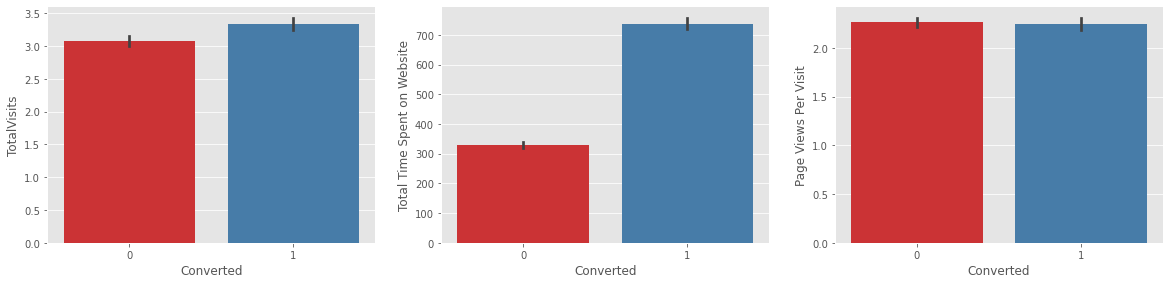

In [1322]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = inp0_df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set1', data = inp0_df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set1', data = inp0_df)
plt.show()

#### Observation :
- The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit.


###  3.4 Data Preparation

#### Converting Binary (Yes/No) to 0/1

In [1323]:
# determine unique values
for k, v in inp0_df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Lead Number = 9240
Lead Origin = 5
Lead Source = 9
Do Not Email = 2
Specialization = 3
What is your current occupation = 3
City = 3
A free copy of Mastering The Interview = 2


In [1324]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
inp0_df[varlist] = inp0_df[varlist].apply(binary_map)

In [1325]:
# check the operation was success
inp0_df['Do Not Email'].value_counts(normalize = True, dropna = False) * 100

0    92.056277
1     7.943723
Name: Do Not Email, dtype: float64

In [1326]:
# check the operation was success
inp0_df['A free copy of Mastering The Interview'].value_counts(normalize = True, dropna = False) * 100

0    68.744589
1    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

##### For categorical variables with multiple levels, we will create dummy features (one-hot encoded)¶

In [1327]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(inp0_df[['Lead Origin', 'Lead Source','Specialization','City','What is your current occupation']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Industry Specializations,Specialization_Management Specializations,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [1328]:
# Adding the results to the master dataframe
inp0_df = pd.concat([inp0_df, dummy1], axis=1)
inp0_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Industry Specializations,Specialization_Management Specializations,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,API,Olark Chat,0,0,0,0,0.0,Management Specializations,Unemployed,Mumbai,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,660728,API,Organic Search,0,0,5,674,2.5,Management Specializations,Unemployed,Non-Mumbai Maharashtra Cities,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Business Specializations,Student and Others,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Industry Specializations,Unemployed,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Management Specializations,Unemployed,Mumbai,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [1329]:
# drop the initial columns for which we have already created dummies
inp0_df = inp0_df.drop(['Lead Origin', 'Lead Source','Specialization','City','What is your current occupation'], axis = 1)

In [1330]:
inp0_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   object 
 1   Do Not Email                                          9240 non-null   int64  
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   int32  
 4   Total Time Spent on Website                           9240 non-null   int64  
 5   Page Views Per Visit                                  9240 non-null   float64
 6   A free copy of Mastering The Interview                9240 non-null   int64  
 7   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 8   Lead Origin_Lead Add Form                             9240

# 4. Test-Train Split 

In [1331]:
from sklearn.model_selection import train_test_split

In [1332]:
# Putting feature variable to X
X = inp0_df.drop(['Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Industry Specializations,Specialization_Management Specializations,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0,5,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
2,0,2,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,2,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [1333]:
# Putting response variable to y
y = inp0_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1334]:
# Splitting the data into train and test
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# 5. Feature Scaling

In [1335]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Industry Specializations,Specialization_Management Specializations,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
6795,0,0.299722,0.005716,-0.516439,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
8105,0,0.662077,1.365219,1.553761,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


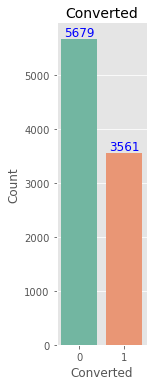

In [1336]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=inp0_df, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

In [1337]:
# checking the conversion rate
conversion = (sum(inp0_df['Converted'])/len(inp0_df['Converted'].index))*100
conversion

38.53896103896104

- The conversion rate is 38.5%

# 6. Looking at Correlations¶

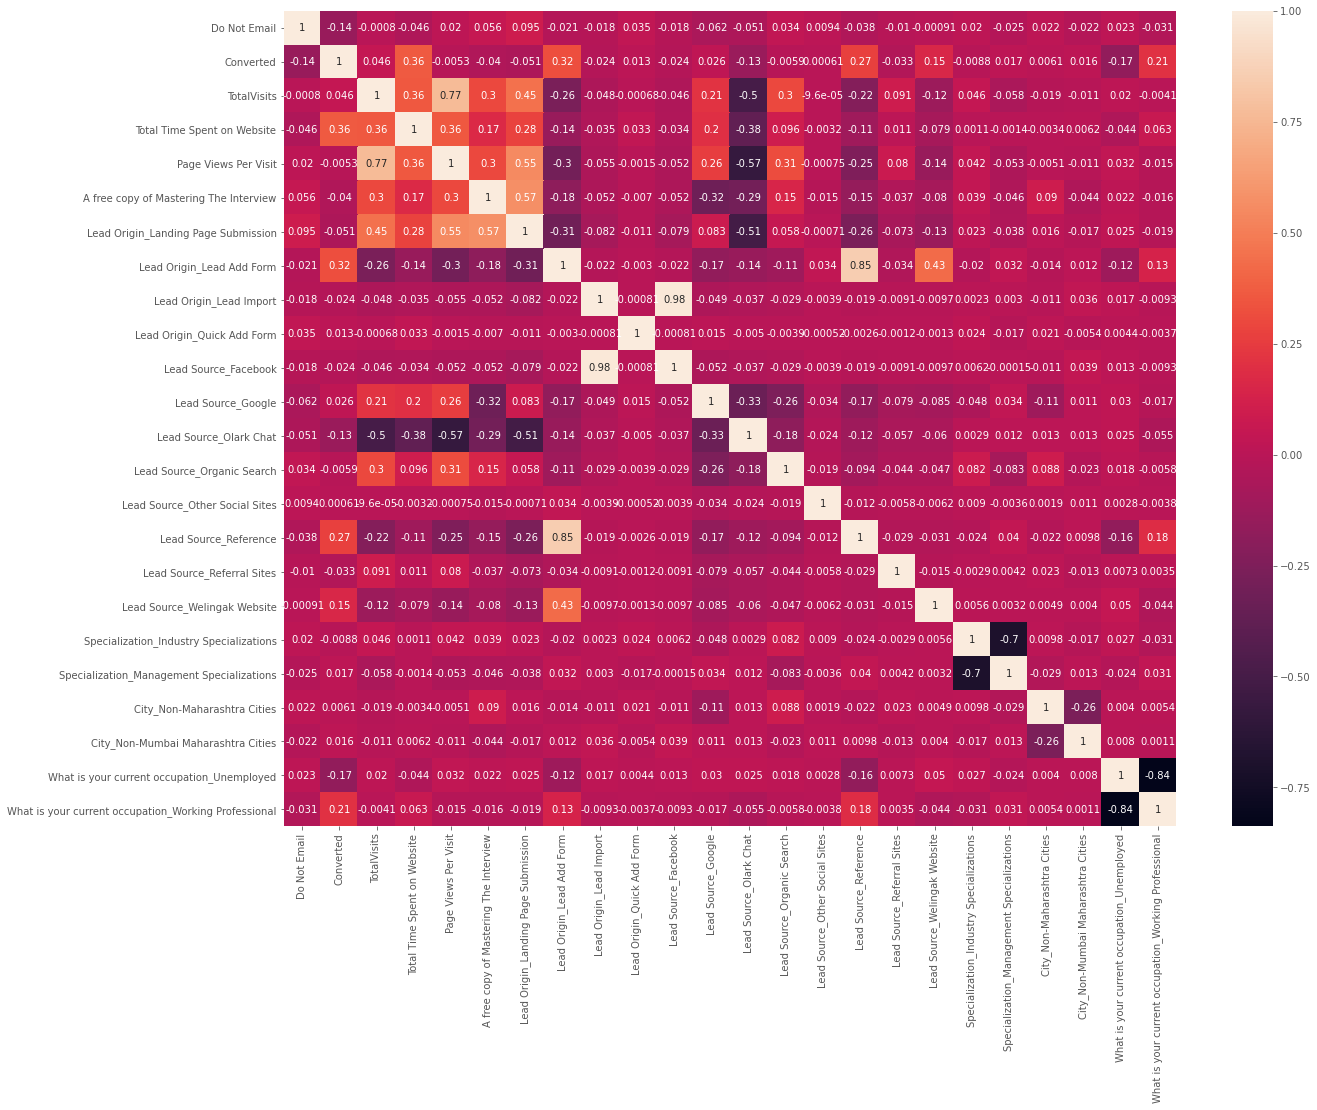

In [1338]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(inp0_df.corr(),annot = True)
plt.show()

From the heat map we can see  there are few correlated features. We will refer this map along with the p vale and Vif value after bilding models and decide to keep or eliminate the features accordingly.

# 7. Model Building


#### Model 1: With all variables
Running Your First Training Model

In [1339]:
import statsmodels.api as sm

In [1340]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3133.2
Date:                Sat, 12 Jun 2021   Deviance:                       6266.4
Time:                        01:52:25   Pearson chi2:                 6.76e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6146      0.220     -7.340      0.000      -2.046      -1.183
Do Not Email                                            -1.3766      0.155     -8.882      0.000      -1.680      -1.073
TotalVisits                                              0.2563      0.048      5.347      0.000       0.162       0.350
Total Time Spent on Website                              1.0992      0.037     29.954      0.000       1.027       1.171
Page Views Per Visit                                    -0.1173      0.054     -2.156      0.031      -0.224      -0.011
A free copy of Mastering The Interview                  -0.0463      0.096     -0.483      0.629      -0.234       0.142
Lead Origin_Landing Page Submission                      0.0838      0.096      0.874      0.382      -0.104       0.272
Lead Origin_Lead Add Form                                3.6004      0.474      7.597      0.000       2.672       4.529
Lead Origin_Lead Import                                  0.2836      2.086      0.136      0.892      -3.806       4.373
Lead Origin_Quick Add Form                              19.2613   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Facebook                                    -0.3157      2.087     -0.151      0.880      -4.405       3.774
Lead Source_Google                                       0.3034      0.103      2.958      0.003       0.102       0.504
Lead Source_Olark Chat                                   1.0665      0.145      7.354      0.000       0.782       1.351
Lead Source_Organic Search                               0.1185      0.118      1.001      0.317      -0.114       0.351
Lead Source_Other Social Sites                           0.1363      0.592      0.230      0.818      -1.024       1.296
Lead Source_Reference                                    0.7267      0.509      1.428      0.153      -0.271       1.724
Lead Source_Referral Sites                              -0.3433      0.296     -1.159      0.246      -0.924       0.237
Lead Source_Welingak Website                             2.6386      0.860      3.067      0.002       0.952       4.325
Specialization_Industry Specializations                  0.1160      0.123      0.942      0.346      -0.125       0.358
Specialization_Management Specializations                0.0741      0.100      0.743      0.457      -0.121       0.270
City_Non-Maharashtra Cities                              0.1690      0.081      2.086      0.037       0.010       0.328
City_Non-Mumbai Maharashtra Cities                       0.1112      0.079      1.400      0.162      -0.044       0.267
What is your current occupation_Unemployed               0

#### Feature Selection Using RFE

In [1341]:
# Running RFE with the output number of the variable equal to 14
from sklearn.linear_model import LogisticRegression
# initiate logistic regression
logreg = LogisticRegression()

# initiate rfe
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 14)             # running RFE with 14 variables as output
rfe = rfe.fit(X_train, y_train)

In [1342]:
rfe.support_

array([ True,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
       False,  True,  True,  True,  True])

In [1343]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 9),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Other Social Sites', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Industry Specializations', False, 6),
 ('Specialization_Management Specializations', False, 7),
 ('City_Non-Maharashtra Cities', True, 1),
 ('City_Non-Mumbai Maharashtra Cities', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Prof

In [1344]:
col = X_train.columns[rfe.support_]

In [1345]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Organic Search',
       'Lead Source_Other Social Sites',
       'Specialization_Industry Specializations',
       'Specialization_Management Specializations'],
      dtype='object')

#### Rebuilding Model - Using statsmodels

#### Model 2:

In [1346]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3136.4
Date:                Sat, 12 Jun 2021   Deviance:                       6272.7
Time:                        01:52:49   Pearson chi2:                 6.79e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5019      0.178     -8.427      0.000      -1.851      -1.153
Do Not Email                                            -1.3694      0.155     -8.850      0.000      -1.673      -1.066
TotalVisits                                              0.2082      0.039      5.349      0.000       0.132       0.284
Total Time Spent on Website                              1.0955      0.037     29.958      0.000       1.024       1.167
Lead Origin_Lead Add Form                                3.6627      0.462      7.928      0.000       2.757       4.568
Lead Origin_Quick Add Form                              19.3060   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                                       0.2729      0.073      3.727      0.000       0.129       0.416
Lead Source_Olark Chat                                   1.1058      0.112      9.895      0.000       0.887       1.325
Lead Source_Reference                                    0.7033      0.496      1.419      0.156      -0.268       1.674
Lead Source_Referral Sites                              -0.4193      0.284     -1.476      0.140      -0.976       0.138
Lead Source_Welingak Website                             2.6126      0.852      3.065      0.002       0.942       4.283
City_Non-Maharashtra Cities                              0.1712      0.081      2.121      0.034       0.013       0.329
City_Non-Mumbai Maharashtra Cities                       0.1108      0.079      1.397      0.162      -0.045       0.266
What is your current occupation_Unemployed               0.2262      0.173      1.309      0.191      -0.112       0.565
What is your current occupation_Working Professional     1.3921      0.193      7.209      0.000       1.014       1.771
========================================================================================================================
"""

#### Model 3
Removing the variable 'Lead Origin_Quick Add Form' based on its High P Value

In [1347]:
col = col.drop("Lead Origin_Quick Add Form", 1)

In [1348]:
# Add a constant
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3136.6
Date:                Sat, 12 Jun 2021   Deviance:                       6273.2
Time:                        01:53:03   Pearson chi2:                 6.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5029      0.178     -8.433      0.000      -1.852      -1.154
Do Not Email                                            -1.3645      0.154     -8.844      0.000      -1.667      -1.062
TotalVisits                                              0.2080      0.039      5.345      0.000       0.132       0.284
Total Time Spent on Website                              1.0963      0.037     29.996      0.000       1.025       1.168
Lead Origin_Lead Add Form                                3.6612      0.462      7.928      0.000       2.756       4.566
Lead Source_Google                                       0.2738      0.073      3.740      0.000       0.130       0.417
Lead Source_Olark Chat                                   1.1068      0.112      9.904      0.000       0.888       1.326
Lead Source_Reference                                    0.7055      0.495      1.424      0.154      -0.265       1.677
Lead Source_Referral Sites                              -0.4191      0.284     -1.475      0.140      -0.976       0.138
Lead Source_Welingak Website                             2.6139      0.852      3.067      0.002       0.944       4.284
City_Non-Maharashtra Cities                              0.1723      0.081      2.135      0.033       0.014       0.330
City_Non-Mumbai Maharashtra Cities                       0.1108      0.079      1.398      0.162      -0.045       0.266
What is your current occupation_Unemployed               0.2264      0.173      1.310      0.190      -0.112       0.565
What is your current occupation_Working Professional     1.3921      0.193      7.208      0.000       1.014       1.771
========================================================================================================================
"""

#### Model 4
Removing the variable 'What is your current occupation_Unemployed' based on its High P Value

In [1349]:
col = col.drop("What is your current occupation_Unemployed", 1)

In [1350]:
# Add a constant
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3137.5
Date:                Sat, 12 Jun 2021   Deviance:                       6275.0
Time:                        01:53:58   Pearson chi2:                 6.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2859      0.065    -19.843      0.000      -1.413      -1.159
Do Not Email                                            -1.3641      0.154     -8.844      0.000      -1.666      -1.062
TotalVisits                                              0.2083      0.039      5.354      0.000       0.132       0.285
Total Time Spent on Website                              1.0961      0.037     29.994      0.000       1.024       1.168
Lead Origin_Lead Add Form                                3.6617      0.462      7.924      0.000       2.756       4.567
Lead Source_Google                                       0.2755      0.073      3.764      0.000       0.132       0.419
Lead Source_Olark Chat                                   1.1029      0.112      9.874      0.000       0.884       1.322
Lead Source_Reference                                    0.6997      0.496      1.412      0.158      -0.272       1.671
Lead Source_Referral Sites                              -0.4133      0.284     -1.455      0.146      -0.970       0.144
Lead Source_Welingak Website                             2.6222      0.852      3.077      0.002       0.952       4.293
City_Non-Maharashtra Cities                              0.1735      0.081      2.151      0.031       0.015       0.332
City_Non-Mumbai Maharashtra Cities                       0.1121      0.079      1.415      0.157      -0.043       0.267
What is your current occupation_Working Professional     1.1747      0.098     11.932      0.000       0.982       1.368
========================================================================================================================
"""

#### Model 5
Removing the variable 'Lead Source_Reference' based on its high P Values.

In [1351]:
col = col.drop("Lead Source_Reference", 1)

In [1352]:
# Add a constant
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3138.4
Date:                Sat, 12 Jun 2021   Deviance:                       6276.8
Time:                        01:54:41   Pearson chi2:                 6.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2789      0.065    -19.804      0.000      -1.405      -1.152
Do Not Email                                            -1.3851      0.154     -8.968      0.000      -1.688      -1.082
TotalVisits                                              0.2075      0.039      5.332      0.000       0.131       0.284
Total Time Spent on Website                              1.0962      0.037     29.991      0.000       1.025       1.168
Lead Origin_Lead Add Form                                4.2696      0.193     22.164      0.000       3.892       4.647
Lead Source_Google                                       0.2634      0.073      3.621      0.000       0.121       0.406
Lead Source_Olark Chat                                   1.0955      0.112      9.821      0.000       0.877       1.314
Lead Source_Referral Sites                              -0.4189      0.284     -1.474      0.140      -0.976       0.138
Lead Source_Welingak Website                             2.0124      0.741      2.717      0.007       0.561       3.464
City_Non-Maharashtra Cities                              0.1713      0.081      2.123      0.034       0.013       0.329
City_Non-Mumbai Maharashtra Cities                       0.1119      0.079      1.413      0.158      -0.043       0.267
What is your current occupation_Working Professional     1.1784      0.098     11.986      0.000       0.986       1.371
========================================================================================================================
"""

#### Model 6
Removing the variable 'City_Non-Mumbai Maharashtra Cities' based on its high P Values.


In [1353]:
col = col.drop("City_Non-Mumbai Maharashtra Cities", 1)

In [1354]:
# Add a constant
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3139.4
Date:                Sat, 12 Jun 2021   Deviance:                       6278.8
Time:                        01:55:36   Pearson chi2:                 6.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2477      0.061    -20.615      0.000      -1.366      -1.129
Do Not Email                                            -1.3865      0.155     -8.971      0.000      -1.689      -1.084
TotalVisits                                              0.2068      0.039      5.313      0.000       0.130       0.283
Total Time Spent on Website                              1.0973      0.037     30.023      0.000       1.026       1.169
Lead Origin_Lead Add Form                                4.2715      0.193     22.178      0.000       3.894       4.649
Lead Source_Google                                       0.2604      0.073      3.582      0.000       0.118       0.403
Lead Source_Olark Chat                                   1.0961      0.112      9.830      0.000       0.878       1.315
Lead Source_Referral Sites                              -0.4199      0.284     -1.477      0.140      -0.977       0.137
Lead Source_Welingak Website                             2.0074      0.740      2.711      0.007       0.556       3.459
City_Non-Maharashtra Cities                              0.1407      0.078      1.812      0.070      -0.012       0.293
What is your current occupation_Working Professional     1.1787      0.098     11.992      0.000       0.986       1.371
========================================================================================================================
"""

#### Model 7
Removing the variable 'Lead Source_Referral Sites' based on its high P Values.

In [1355]:
col = col.drop("Lead Source_Referral Sites", 1)

In [1356]:
# Add a constant
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3140.5
Date:                Sat, 12 Jun 2021   Deviance:                       6281.1
Time:                        01:56:25   Pearson chi2:                 6.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2602      0.060    -20.995      0.000      -1.378      -1.143
Do Not Email                                            -1.3836      0.155     -8.953      0.000      -1.687      -1.081
TotalVisits                                              0.2037      0.039      5.244      0.000       0.128       0.280
Total Time Spent on Website                              1.0980      0.037     30.042      0.000       1.026       1.170
Lead Origin_Lead Add Form                                4.2799      0.193     22.230      0.000       3.903       4.657
Lead Source_Google                                       0.2735      0.072      3.788      0.000       0.132       0.415
Lead Source_Olark Chat                                   1.1061      0.111      9.934      0.000       0.888       1.324
Lead Source_Welingak Website                             2.0083      0.740      2.712      0.007       0.557       3.459
City_Non-Maharashtra Cities                              0.1398      0.078      1.800      0.072      -0.012       0.292
What is your current occupation_Working Professional     1.1790      0.098     11.993      0.000       0.986       1.372
========================================================================================================================
"""

#### Model 8
Removing the variable 'City_Non-Maharashtra Cities' based on its high P Values.

In [1357]:
col = col.drop("City_Non-Maharashtra Cities", 1)

In [1358]:
# Add a constant
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6459
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3142.1
Date:                Sat, 12 Jun 2021   Deviance:                       6284.3
Time:                        01:57:02   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2225      0.056    -21.811      0.000      -1.332      -1.113
Do Not Email                                            -1.3769      0.154     -8.924      0.000      -1.679      -1.075
TotalVisits                                              0.2014      0.039      5.192      0.000       0.125       0.277
Total Time Spent on Website                              1.0983      0.037     30.052      0.000       1.027       1.170
Lead Origin_Lead Add Form                                4.2612      0.192     22.190      0.000       3.885       4.638
Lead Source_Google                                       0.2557      0.071      3.577      0.000       0.116       0.396
Lead Source_Olark Chat                                   1.0971      0.111      9.872      0.000       0.879       1.315
Lead Source_Welingak Website                             2.0261      0.741      2.736      0.006       0.575       3.478
What is your current occupation_Working Professional     1.1791      0.098     11.997      0.000       0.986       1.372
========================================================================================================================
"""

In [1359]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.209255
6795    0.239416
3516    0.320498
8105    0.660600
3934    0.209255
4844    0.887254
3297    0.148702
8071    0.980506
987     0.328350
7423    0.766602
dtype: float64

In [1360]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20925542, 0.2394162 , 0.32049815, 0.66060029, 0.20925542,
       0.88725443, 0.14870154, 0.98050589, 0.32834954, 0.76660234])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [1361]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,0,0.209255,1871
1,0,0.239416,6795
2,0,0.320498,3516
3,0,0.660600,8105
4,0,0.209255,3934


#### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [1362]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted
0,0,0.209255,1871,0
1,0,0.239416,6795,0
2,0,0.320498,3516,0
3,0,0.660600,8105,1
4,0,0.209255,3934,0


In [1363]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3513  489]
 [ 935 1531]]


In [1364]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        3538      464
# Converted            951       1515 

In [1365]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.779839208410637


#### Checking VIFs

In [1366]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,1.47
3,Lead Origin_Lead Add Form,1.41
5,Lead Source_Olark Chat,1.39
2,Total Time Spent on Website,1.24
6,Lead Source_Welingak Website,1.23
7,What is your current occupation_Working Profes...,1.12
4,Lead Source_Google,1.10
0,Do Not Email,1.03


- All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only


# 8. Model Validation

In [1367]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.209255
6795    0.239416
3516    0.320498
8105    0.660600
3934    0.209255
4844    0.887254
3297    0.148702
8071    0.980506
987     0.328350
7423    0.766602
dtype: float64

In [1368]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20925542, 0.2394162 , 0.32049815, 0.66060029, 0.20925542,
       0.88725443, 0.14870154, 0.98050589, 0.32834954, 0.76660234])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [1369]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,0,0.209255,1871
1,0,0.239416,6795
2,0,0.320498,3516
3,0,0.660600,8105
4,0,0.209255,3934


#### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [1370]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [1371]:
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted
0,0,0.209255,1871,0
1,0,0.239416,6795,0
2,0,0.320498,3516,0
3,0,0.660600,8105,1
4,0,0.209255,3934,0


In [1372]:
from sklearn import metrics

In [1373]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3513  489]
 [ 935 1531]]


In [1374]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        3525      477
# Converted            757       1709 

In [1375]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.779839208410637


#### Metrics beyond simply accuracy

In [1376]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1377]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6208434712084347

In [1378]:
# Let us calculate specificity
TN / float(TN+FP)

0.8778110944527736

In [1379]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.12218890554722639


In [1380]:
# positive predictive value 
print (TP / float(TP+FP))

0.7579207920792079


In [1381]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7897931654676259


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1382]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1383]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

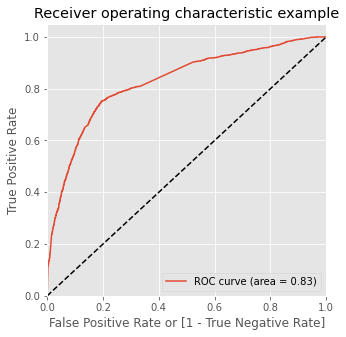

In [1384]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

###  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1385]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.209255,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.239416,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.320498,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.660600,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.209255,3934,0,1,1,1,0,0,0,0,0,0,0


In [1386]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.438621  0.990268  0.098701
0.2   0.2  0.628942  0.906326  0.458021
0.3   0.3  0.777211  0.764801  0.784858
0.4   0.4  0.784941  0.708029  0.832334
0.5   0.5  0.779839  0.620843  0.877811
0.6   0.6  0.765306  0.531225  0.909545
0.7   0.7  0.741187  0.414031  0.942779
0.8   0.8  0.715368  0.298054  0.972514
0.9   0.9  0.666667  0.135848  0.993753


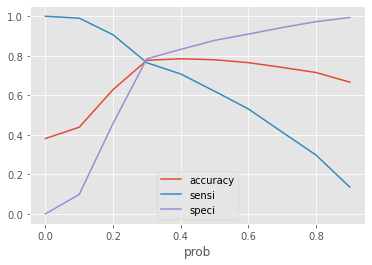

In [1387]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [1388]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.209255,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.239416,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.320498,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.660600,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.209255,3934,0,1,1,1,0,0,0,0,0,0,0,0


### Assigning Lead Score

In [1389]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.209255,1871,0,1,1,1,0,0,0,0,0,0,0,0,21
1,0,0.239416,6795,0,1,1,1,0,0,0,0,0,0,0,0,24
2,0,0.320498,3516,0,1,1,1,1,0,0,0,0,0,0,1,32
3,0,0.660600,8105,1,1,1,1,1,1,1,1,0,0,0,1,66
4,0,0.209255,3934,0,1,1,1,0,0,0,0,0,0,0,0,21


In [1390]:
# checking if 80% cases are correctly predicted based on the converted column.
# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1886
0     580
Name: final_predicted, dtype: int64

In [1392]:
# check the precentage of final_predicted conversions

1886/float(1886+580)

0.764801297648013

#### Hence we can see that the final prediction of conversions have a target of 80% (79.9%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

In [1393]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

0.7772108843537415


In [1394]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.764801297648013

In [1395]:
# Let us calculate specificity
TN / float(TN+FP)

0.7848575712143928

In [1396]:
# Calculate false postive rate - predicting Convertion when customer does not have Converted
print(FP/ float(TN+FP))

0.2151424287856072


In [1397]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6865671641791045


In [1398]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8441279226014512


### Precision and Recall

In [1399]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3141,  861],
       [ 580, 1886]], dtype=int64)

##### Precision
TP / TP + FP

In [1400]:

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6865671641791045

#### Recall
TP / TP + FN

In [1401]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.764801297648013

Using sklearn utilities for the same

In [1402]:
from sklearn.metrics import precision_score, recall_score

#### precision_score

In [1403]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6865671641791045

#### recall_score


In [1404]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.764801297648013

### Precision and recall tradeoff

In [1405]:
from sklearn.metrics import precision_recall_curve

In [1406]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [1407]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

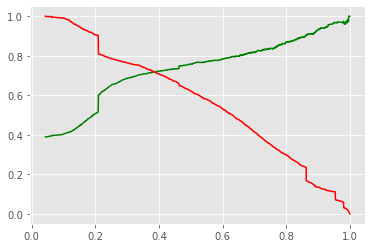

In [1408]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [1409]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [1410]:
X_test = X_test[col]
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Industry Specializations,Specialization_Management Specializations,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
6795,0,0.299722,0.005716,-0.516439,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
8105,0,0.662077,1.365219,1.553761,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [1411]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [1412]:
y_test_pred = res.predict(X_test_sm)

In [1413]:
y_test_pred[:10]

4269    0.547137
2376    0.862314
7766    0.375597
9199    0.209255
4359    0.862314
9186    0.376831
1631    0.557217
8963    0.195715
8007    0.220878
5324    0.163784
dtype: float64

In [1414]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1415]:
# Let's see the head
y_pred_1.head()

,0
4269,0.547137
2376,0.862314
7766,0.375597
9199,0.209255
4359,0.862314


In [1416]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1417]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [1418]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1419]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1420]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.547137
1,1,2376,0.862314
2,1,7766,0.375597
3,0,9199,0.209255
4,1,4359,0.862314


In [1421]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [1422]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead Number,Converted_prob
0,1,4269,0.547137
1,1,2376,0.862314
2,1,7766,0.375597
3,0,9199,0.209255
4,1,4359,0.862314


In [1423]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [1424]:
y_pred_final.head()

,Converted,Lead Number,Converted_prob,final_predicted
0,1,4269,0.547137,1
1,1,2376,0.862314,1
2,1,7766,0.375597,1
3,0,9199,0.209255,0
4,1,4359,0.862314,1


#### Assigning Lead Score to test set

In [1425]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Lead Number,Converted_prob,final_predicted,Lead_Score
0,1,4269,0.547137,1,55
1,1,2376,0.862314,1,86
2,1,7766,0.375597,1,38
3,0,9199,0.209255,0,21
4,1,4359,0.862314,1,86


In [1426]:
# checking if 80% cases are correctly predicted based on the converted column.
# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df_t = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df_t['final_predicted'].value_counts()

1    826
0    269
Name: final_predicted, dtype: int64

In [1427]:
# check the precentage of final_predicted conversions

826/float(826+269)

0.754337899543379

Hence we can see that the final prediction of conversions have a target rate of 80%. 

In [1428]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7716450216450217

In [1429]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1313,  364],
       [ 269,  826]], dtype=int64)

In [1430]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1431]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.754337899543379

In [1432]:
# Let us calculate specificity
TN / float(TN+FP)

0.7829457364341085

In [1433]:
# Calculate Precision

TP/(TP+FP)

0.6941176470588235

In [1434]:
# Calculate Recall

TP/(TP+FN)

0.754337899543379


#### Final Summary:
- We have checked both Sensitivity-Specificity as well as Precision and Recall Metrics
- Accuracy, Sensitivity and Specificity values
 - Train Accuracy : 79.4% Sensitivity : 80% Specificity :  79%
 - Test  Accuracy : 80.3% Sensitivity : 80%  Specificity : 80.5%
- Precision and Recall
 - Train Precision : 70.2% Recall :  80% 
 - Test  Precision : 72.8% Recall :  80%
